In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [11]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

In [12]:
batch_size = 32
num_classes = 10
epochs = 40
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train.dtype)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
uint8


In [14]:

print(y_train[:10])
print(y_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("__this is after keras.utils.to_categorical__")
print(y_train[:10])
print(y_train.shape)

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
(50000, 1)
__this is after keras.utils.to_categorical__
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
(50000, 10)


In [17]:
def no_batch_norm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    print(type(model))
    model.summary()
    return model

In [18]:
myModel = no_batch_norm()

<class 'keras.engine.sequential.Sequential'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (N

In [19]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

myModel.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0729 05:31:17.147496 140582718240512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 05:31:17.154800 140582718240512 deprecation_wrapper.py:119] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.dtype)
print(x_train[0,:5,:5])

float32
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  [0.26666668 0.21176471 0.16470589]
  [0.38431373 0.28627452 0.20392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  [0.2        0.10588235 0.03137255]
  [0.34509805 0.2        0.08235294]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  [0.3254902  0.19607843 0.09019608]
  [0.43137255 0.28235295 0.16078432]]

 [[0.12941177 0.09803922 0.06666667]
  [0.14901961 0.07843138 0.01568628]
  [0.34117648 0.21176471 0.09803922]
  [0.41568628 0.24705882 0.10980392]
  [0.4509804  0.27450982 0.12941177]]

 [[0.19607843 0.1254902  0.08235294]
  [0.23137255 0.1254902  0.04313726]
  [0.4        0.25490198 0.13333334]
  [0.49803922 0.30980393 0.15294118]
  [0.4862745  0.3019608  0.14117648]]]


In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=3,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [22]:
datagen.fit(x_train)

In [23]:
## Using a data generator <May limit the GPU performance because GPU is too fast>
## This version has data augmentation
history = myModel.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size*3),
                                steps_per_epoch= x_train.shape[0] //(batch_size*3),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    workers=8)


W0729 05:31:34.208864 140582718240512 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
520/520 [==============================] - 36s 70ms/step - loss: 1.9371 - acc: 0.2890 - val_loss: 1.6826 - val_acc: 0.3937
Epoch 2/30
520/520 [==============================] - 30s 57ms/step - loss: 1.7102 - acc: 0.3748 - val_loss: 1.5487 - val_acc: 0.4316
Epoch 3/30
520/520 [==============================] - 29s 57ms/step - loss: 1.6205 - acc: 0.4088 - val_loss: 1.4685 - val_acc: 0.4645
Epoch 4/30
520/520 [==============================] - 30s 57ms/step - loss: 1.5492 - acc: 0.4378 - val_loss: 1.4061 - val_acc: 0.4968
Epoch 5/30
520/520 [==============================] - 29s 56ms/step - loss: 1.4925 - acc: 0.4590 - val_loss: 1.3385 - val_acc: 0.5197
Epoch 6/30
520/520 [==============================] - 29s 56ms/step - loss: 1.4512 - acc: 0.4755 - val_loss: 1.3203 - val_acc: 0.5270
Epoch 7/30
520/520 [==============================] - 29s 56ms/step - loss: 1.4078 - acc: 0.4946 - val_loss: 1.3440 - val_acc: 0.5275
Epoch 8/30
520/520 [==============================] - 28s 55ms

In [24]:
if not os.path.isdir("./models"):
    os.makedirs("./models")
myModel_save_path = "./models/model_generator_aug.hdf5"
myModel.save(myModel_save_path)

In [25]:
scores = myModel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 70us/step
Test loss: 0.8977753735542298
Test accuracy: 0.6804


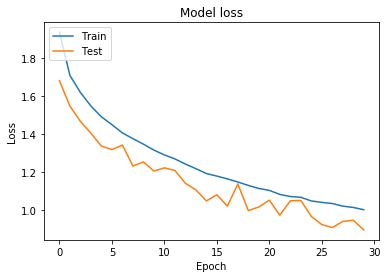

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
#REDEFINE and re-compile the model here, and run for the same 30 epochs.
myModel = no_batch_norm()
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

myModel.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

<class 'keras.engine.sequential.Sequential'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (N

In [28]:
## Direcly using 
history_no_generator = myModel.fit(x_train, y_train,
                                 batch_size=batch_size*3,
                    epochs=30,
                    validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 110us/step - loss: 1.9218 - acc: 0.2976 - val_loss: 1.7824 - val_acc: 0.3638
Epoch 2/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.6560 - acc: 0.3975 - val_loss: 1.5358 - val_acc: 0.4484
Epoch 3/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.5502 - acc: 0.4396 - val_loss: 1.4280 - val_acc: 0.4889
Epoch 4/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.4647 - acc: 0.4713 - val_loss: 1.3764 - val_acc: 0.5034
Epoch 5/30
50000/50000 [==============================] - 5s 97us/step - loss: 1.3953 - acc: 0.4973 - val_loss: 1.3056 - val_acc: 0.5400
Epoch 6/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.3389 - acc: 0.5188 - val_loss: 1.2516 - val_acc: 0.5559
Epoch 7/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.2897 - acc: 0.5406 - val_loss: 1.2307 - val_ac

In [29]:
if not os.path.isdir("./models"):
    os.makedirs("./models")
myModel_save_path = "./models/model_without_generator.hdf5"
myModel.save(myModel_save_path)

In [30]:
scores = myModel.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 66us/step
Test loss: 0.769478184890747
Test accuracy: 0.7348


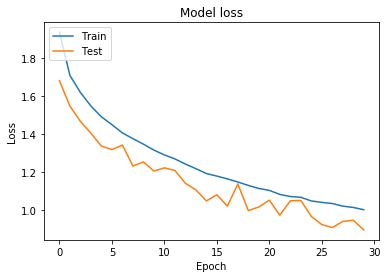

In [31]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Data Augmentation Visualization

In [22]:
!ls -a
!echo ""
!rm -rf ./augmented_pictures/
!echo ""
!ls -a

.			.git		    Pioneer_main.ipynb
..			.ipynb_checkpoints  Skimage_learning.ipynb
data_aug_cifar10.ipynb	models		    skimage_nupmy.ipynb


.			.git		    Pioneer_main.ipynb
..			.ipynb_checkpoints  Skimage_learning.ipynb
data_aug_cifar10.ipynb	models		    skimage_nupmy.ipynb


In [29]:
#Visualize some results of data augmentation
import matplotlib.pyplot as plt
import PIL

SAVE_PATH = "./augmented_pictures/"
    
def output_augmented(num):
    img = None
    sub_img= None
    name_list = None

    if not os.path.isdir(SAVE_PATH):
        os.makedirs(SAVE_PATH)

    gen_data = datagen.flow(x_train, 
                                           batch_size=1, 
                                           shuffle=False, 
                                           save_to_dir=SAVE_PATH,
                                           save_prefix=('generated'+ str(num)))
    for i in range(9):
        gen_data.next() 
    
# name_list = os.listdir(SAVE_PATH)
# # print(name_list)
# fig = plt.figure()

# for i in range(len(name_list)):
#     img = PIL.Image.open(SAVE_PATH+name_list[i])
#     sub_img = fig.add_subplot(331 + i)
#     sub_img.imshow(img)
    
# plt.show()

    

In [30]:
for i in range(5):
    output_augmented(i)
    name_list = os.listdir(SAVE_PATH)
#     fig = plt.figure()
#     for i in range(len(name_list)):
#     img = PIL.Image.open(SAVE_PATH+name_list[i])
#     sub_img = fig.add_subplot(331 + i)
#     sub_img.imshow(img)
    

### Data Augmentation for Semantic Segmentation
This section will look at how different approaches can be used to augment the image data, generating the same transformations for both the image and the mask.

In [31]:
segmentation_datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [ ]:
#Define two folders for saving the image and mask together
save_img_path = "./augmented_images"
save_mask_path = "./augmented_masks"

seed = 34

for counter in range(10): # Generate 20 pairs of images and mask, 2 pairs for each iteration
    # The seed stays unchanged, but image_generator and mask_generator are re-initialized every time
    # This is to make sure that every time the 2 images and 2 masks are generated 
    image_generator = segmentation_datagen.flow(x_train,
                                            batch_size=1, 
                                            shuffle=False, 
                                            save_to_dir=SAVE_PATH,
                                            save_prefix=('image_'+ str(num)),
                                            seed=seed)

    mask_generator = segmentation_datagen.flow(x_train,
                                                batch_size=1, 
                                                shuffle=False, 
                                                save_to_dir=SAVE_PATH,
                                                save_prefix=('mask_'+ str(num)),
                                                seed=seed)
    
    
